In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='features')
df = df.fillna(value=0)
X = df[list(df.columns)[1:-2]]
y = df.iloc[:, -1]
X.head()

,lumo_1,homo_1,lumo_2,homo_2,lumo_3,homo_3,LUMO,HOMO,lumo5,homo5,...,h5-h4,h6-h5,wf-h6,ito-L1,l1-l2,l2-l3,l3-l4,l4-l5,l5-l6,l6-wf
0,2.30,5.30,2.5,5.2,2.4,5.9,2.70,5.60,2.50,6.5,...,0.90,-0.10,-2.90,2.40,-0.20,0.1,-0.30,0.20,-0.50,-0.50
1,3.56,6.26,2.4,6.1,0.0,0.0,2.40,6.10,3.47,7.5,...,1.40,0.00,-3.22,1.14,1.16,0.0,3.70,-1.07,0.00,-0.81
2,3.30,5.20,2.0,5.5,0.0,0.0,2.27,5.85,2.50,6.8,...,0.95,-0.60,-2.70,1.40,1.30,0.0,3.23,-0.23,-0.30,-0.70
3,3.30,5.20,2.0,5.5,0.0,0.0,2.28,5.80,2.50,6.8,...,1.00,-0.60,-2.70,1.40,1.30,0.0,3.22,-0.22,-0.30,-0.70
4,5.70,9.50,2.0,5.5,0.0,0.0,2.55,5.90,0.00,0.0,...,0.00,0.78,-2.38,-1.00,3.70,0.0,2.95,0.00,-0.18,-1.57


In [2]:
# preprocess the data and split the data for training and testing
# assign random state for reproducibility
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2793)

# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.490109247812


In [3]:
# see the coefficient of regression
coefficients = regressor.coef_
intercept = regressor.intercept_
print('regression coefficient =\n', coefficients)
print('regression intercept = ', intercept)

regression coefficient =
 [-49.93542562   1.38249313 -55.23682722  51.60445224  12.12743556
  -3.4400028    0.65389787   5.68584617  67.66094939 -51.44851462
  12.16031513  -1.58481741   3.93212639   9.50199845   5.23376093
  13.00997253   2.96723923 -18.85734332   5.88424897   0.89881866
  -8.01794805 -16.34268002   5.95573083   5.69905056   1.38249313
  -1.97114705  32.62612439 -19.74814107  -1.83614316  -4.21661537
  -1.3692916   -0.29067571  46.15007942  45.31035381  22.5629572
   2.75951925   3.01035404  11.83430964]
regression intercept =  22.1050628655


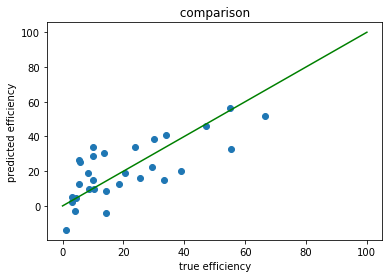

In [4]:
# take a look at our model prediction. the best model will be very close to the line in the middle
plt.scatter(y_test, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [5]:
# print predicted value and actual value to see how far off the prediction
y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %s,  Actual: %s' % (prediction, y_test[i]))

Predicted: -2.90937945263,  Actual: 4.0
Predicted: 19.0575265512,  Actual: 20.4
Predicted: 4.28627245684,  Actual: 4.27
Predicted: 56.24547595,  Actual: 55.0
Predicted: 33.6763963528,  Actual: 10.0
Predicted: 9.72029997608,  Actual: 8.7
Predicted: 19.8408732967,  Actual: 38.8
Predicted: 51.8266153254,  Actual: 66.5
Predicted: 28.5737890126,  Actual: 10.0
Predicted: -13.8054577258,  Actual: 1.0
Predicted: 26.4687305662,  Actual: 5.4
Predicted: 22.1783024306,  Actual: 29.4
Predicted: 30.6128099519,  Actual: 13.5
Predicted: -4.30160061513,  Actual: 14.3
Predicted: 8.55421563972,  Actual: 14.3
Predicted: 45.8199146016,  Actual: 47.2
Predicted: 15.2084350947,  Actual: 33.2
Predicted: 15.9471088161,  Actual: 25.6
Predicted: 25.4170752757,  Actual: 5.6
Predicted: 9.72029997608,  Actual: 10.2
Predicted: 18.9257813559,  Actual: 8.5
Predicted: 4.89845524957,  Actual: 3.02
Predicted: 38.6862954463,  Actual: 30.1
Predicted: 33.7496780367,  Actual: 23.7
Predicted: 12.7567288901,  Actual: 5.47
Predi

### Now we select only features with high correlation to the efficiency

In [6]:
new_X = df[[ 'triplet2', 'homo6', 'HOMO', 'triplet3', 'wf-h6', 'lumo6','h5-h4','t6', 't2', 't5', 'thick']] 
new_X.head()

,triplet2,homo6,HOMO,triplet3,wf-h6,lumo6,h5-h4,t6,t2,t5,thick
0,2.80,6.40,5.60,2.99,-2.90,3.00,0.90,30.0,70.0,5.0,20
1,2.80,7.50,6.10,2.99,-3.22,3.47,1.40,50.0,15.0,20.0,30
2,2.86,6.20,5.85,3.36,-2.70,2.80,0.95,30.0,30.0,5.0,25
3,2.91,6.20,5.80,3.36,-2.70,2.80,1.00,30.0,30.0,5.0,25
4,2.80,6.68,5.90,2.75,-2.38,2.73,0.00,45.0,45.0,0.0,20


In [7]:
# preprocess the data and split the data for training and testing
# assign random state for reproducibility
new_X = preprocessing.scale(new_X)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=2793)

# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.0922015273648


In [8]:
# see the cross validated score using new_X
cv_results = cross_val_score(regressor, new_X, y, cv=4)
cv_results

array([  -10.25323705,    -7.66929689,   -37.13696533, -3330.16450807])

In [9]:
# see the coefficient of regression
coefficients = regressor.coef_
intercept = regressor.intercept_
print('regression coefficient =\n', coefficients)
print('regression intercept = ', intercept)

regression coefficient =
 [  2.49155687  10.28734256   6.70401841  -9.53228988  -5.30290612
  -5.85148473  16.91785208   8.24145417   4.2430866  -12.09567853
   3.90792022]
regression intercept =  23.3485374019


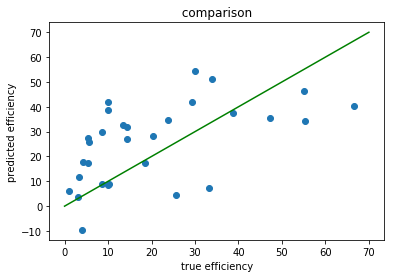

In [10]:
# take a look at our model prediction. the best model will be very close to the line in the middle
plt.scatter(y_test, y_predictions)
plt.plot([0, 70], [0, 70], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()